**b)** Read the data from the CSV file and check the data using the `head()`, `describe()`, and other
Pandas commands. 

In [16]:
import pandas as pd
import os

df = pd.read_csv(os.getcwd() + "/iris-data.csv")

In [12]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**c)** Read again the data marking the missing values with ‘NA’. 

In [13]:
df = pd.read_csv('iris-data.csv', na_values=['NA'])

**d)** Import the MatPlotLib and Seaborn libraries and create a scatterplot matrix of the data.

c:\users\skelo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\skelo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\skelo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\skelo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


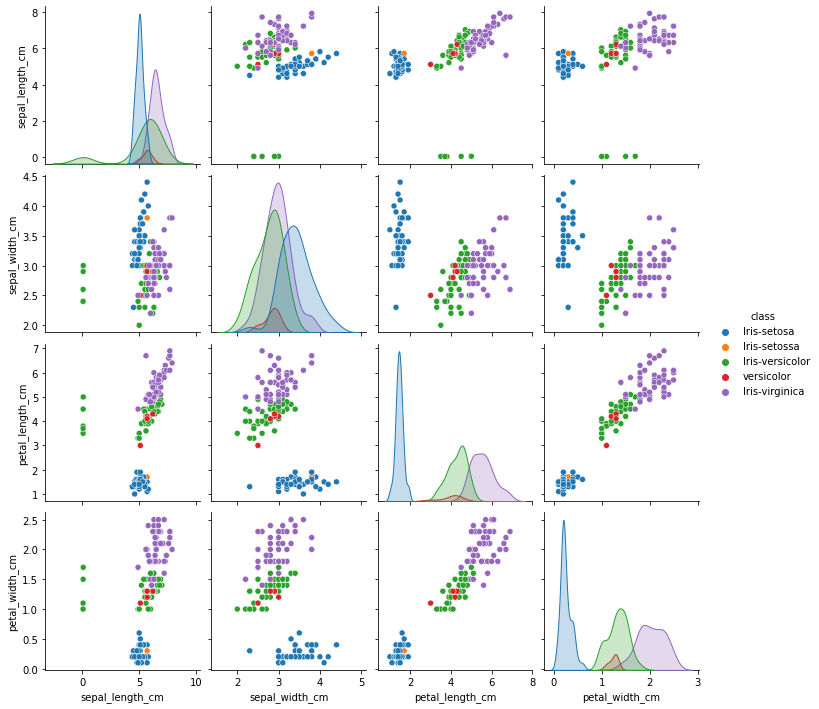

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df.dropna(), hue='class');

**e)** After looking at the plot it seems that the field researchers make some errors inserting the
data. It sounds like one of them forgot to add Iris- before their Iris-versicolor entries. The
other extraneous class, Iris-setossa, was simply a typo that they forgot to fix. Use the
DataFrame to fix these errors. Create a new scatterplot of the data. 


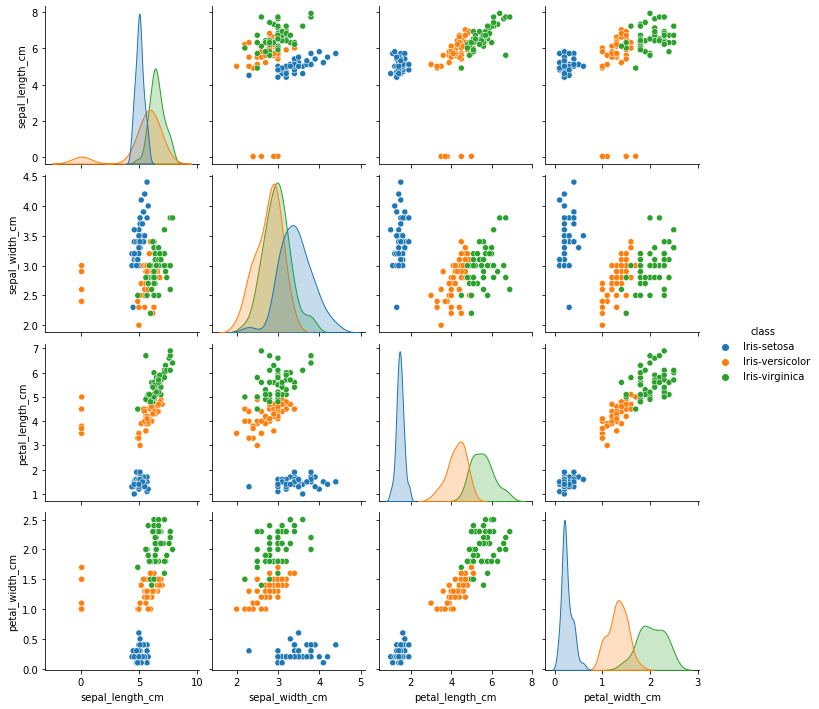

In [31]:
df.loc[df['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
df.loc[df['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

df['class'].unique()
sns.pairplot(df.dropna(), hue='class');

**f)** Looking at the scatter plot, since it is impossible to have any 'Iris-setosa' rows with a sepal
width less than 2.5 cm, drop those values and create an histogram with the 'Iris-setosa' sepal
width. 

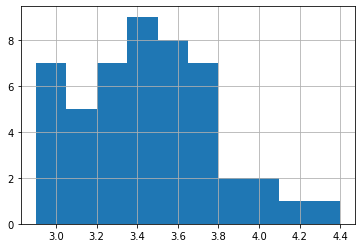

In [34]:
df = df.loc[(df['class'] != 'Iris-setosa') | (df['sepal_width_cm'] >= 2.5)]
df.loc[df['class'] == 'Iris-setosa', 'sepal_width_cm'].hist();

**g)** The next data issue to address is the several near-zero sepal lengths for the Iris-versicolor
rows. Those rows were gathered in meters instead of cm. Please correct that mistake and
draw the corresponding histogram. 

In [38]:
df.loc[(df['class'] == 'Iris-versicolor') & (df['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


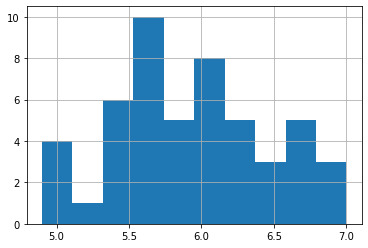

In [42]:
df.loc[(df['class'] == 'Iris-versicolor') & (df['sepal_length_cm'] < 1.0), 'sepal_length_cm'] *= 100.0
df.loc[df['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist();

**h)** One way to deal with missing data is mean imputation. Do that for the missing values of the
petal widths for Iris-setosa and create a new scatter plot for the data. 

In [60]:
average_petal_width = df.loc[df['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

df.loc[(df['class'] == 'Iris-setosa') & (df['petal_width_cm'].isnull()), 'petal_width_cm'] = average_petal_width
df.loc[(df['class'] == 'Iris-setosa') & (df['petal_width_cm'] == average_petal_width)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


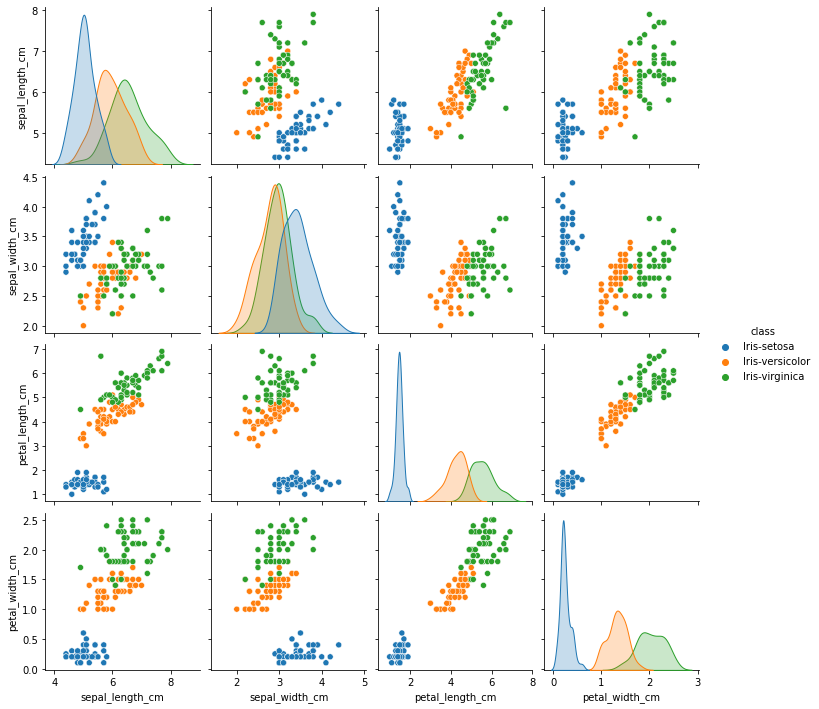

In [61]:
sns.pairplot(df, hue='class');

**i)** Save the new clean dataset to the disk with the name “iris-data-clean.csv”. 

In [63]:
df.to_csv('iris-data-clean.csv', index=False)

**j)** Create some violin plots of the data to compare the measurement distributions of the
classes. Violin plots contain the same information as box plots, but also scales the box
according to the density of the data. 


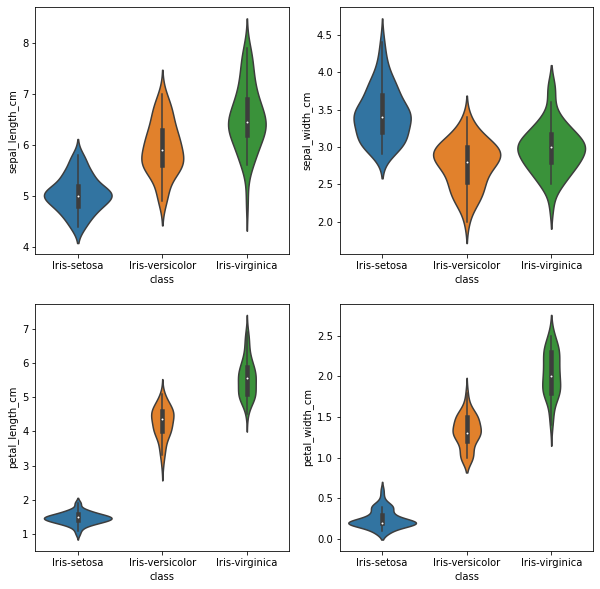

In [52]:
plt.figure(figsize=(10, 10))

for column_index, column in enumerate(df.columns):
    if column != 'class':
        plt.subplot(2, 2, column_index + 1)
        sns.violinplot(x='class', y=column, data=df)

**k)** Create two variables with the inputs and labels using the clean dataset created. 

In [67]:
x = df[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']].values  # Inputs
y = df['class'].values                                                                     # Labels

x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

**l)** Import the `train_test_split` and create randomly training and testing sets with 75% of the
examples on the training set and 25% on the testing set: training_inputs, testing_inputs,
training_classes, testing_classes 


In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

**m)** Import the DecisionTreeClassifier and train the classifier on the training set showing the final
score/accuracy.

In [73]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(x_train, y_train)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(x_test, y_test)

0.9736842105263158

**n)** Experiment 1000 times the classifier and plot a histogram of the obtained accuracies. 

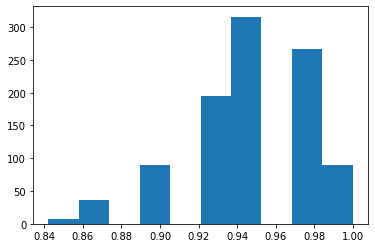

In [74]:
model_accuracies = []

for repetition in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(x_train, y_train)
    classifier_accuracy = decision_tree_classifier.score(x_test, y_test)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies);

**o)** Import StratifiedKFold and use stratified cross-validation with 10 splits and train again the
data. 

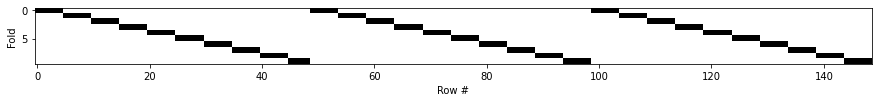

In [80]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), x, y)

Text(0.5, 1.0, 'Average score: 0.96')

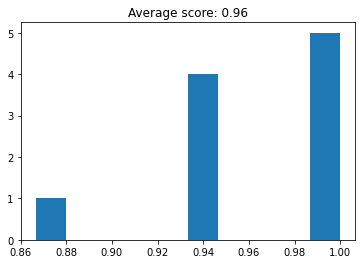

In [82]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, x, y, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

**p)** Import GridSearchCV and perform a Grid Search over the Decision Tree parameters to find
the best parameters, visualizing the grid with the accuracies for each parameters pairs
(max_features 1-4 and max_depth 1-5). 

In [94]:
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5], 'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(x, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9600000000000002
Best parameters: {'max_depth': 3, 'max_features': 2}


**q)** Visualize in a graphical manner the final decision tree achieved.

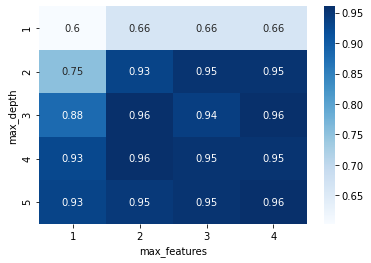

In [97]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sns.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth');

In [101]:
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': [1, 2, 3, 4]
}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier, param_grid=parameter_grid, cv=cross_validation)
grid_search.fit(x, y)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9733333333333334
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 3, 'splitter': 'best'}


In [105]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=3)

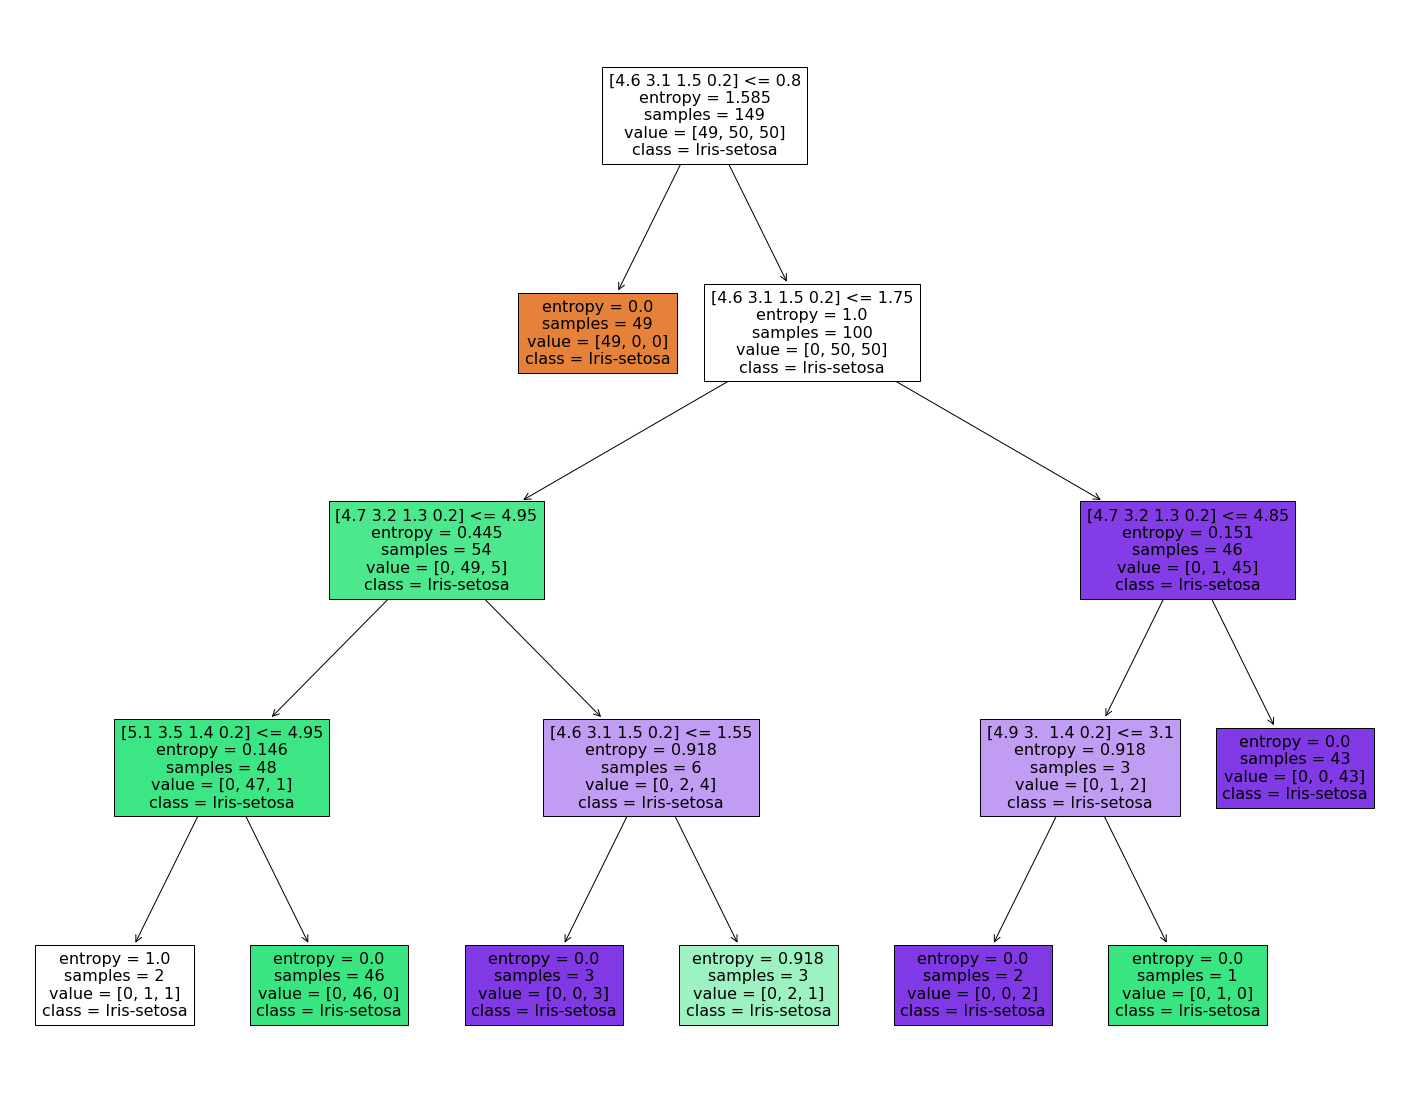

In [114]:
import sklearn.tree as tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(decision_tree_classifier, feature_names=x, class_names=y, filled=True);